In [1]:
from txtai.embeddings import Embeddings
import os
import pandas as pd
import re
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
# Define constants
DATA_DIR = '../datasets'
FILE_NAME = 'Articles.csv'
EMBEDDINGS_PATH = './graph_embeddings'
EMBEDDINGS_MODEL = 'sentence-transformers/nli-mpnet-base-v2'

In [3]:
# Load the data
if os.path.isfile(os.path.join(DATA_DIR, FILE_NAME)):
    df = pd.read_csv(os.path.join(DATA_DIR, FILE_NAME), encoding='latin1')

df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [4]:
# Data pre-processing
data = df['Article'].tolist()
data = [re.split(": *", text, 1)[1] for text in data if ":" in text]
data[:5]

['The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n',
 'Asian markets started 2015 on an upswing in limited trading on Friday, with mainland Chinese stocks surging in Hong Kong on speculation Beijing may ease monetary policy to boost slowing growth.Hong Kong rose 1.07 percent, closing 252.78 points higher at

In [5]:
# Load embeddings model with a graph index and custom functions
topic_categories = ["health", "climate", "finance", "world politics"]

embeddings = Embeddings(
  path=EMBEDDINGS_MODEL,
  content=True,
  functions=[
    {"name": "graph", "function": "graph.attribute"},
  ],
  expressions=[
    {"name": "category", "expression": "graph(indexid, 'category')"},
    {"name": "topic", "expression": "graph(indexid, 'topic')"},
  ],
  graph={
    "topics": {
      "categories": topic_categories
    }
  }
)

In [6]:
embeddings.index(data)

In [7]:
embeddings.save(EMBEDDINGS_PATH)

In [8]:
embeddings.load(EMBEDDINGS_PATH)

In [9]:
# Show the first 5 topics
embeddings.search("select topic, category, text from txtai", 5)

[{'topic': 'prices_per_has_oil',
  'category': 'finance',
  'text': 'The Sindh government has decided to bring down public transport fares by 7 per cent due to massive reduction in petroleum product prices by the federal government, Geo News reported.Sources said reduction in fares will be applicable on public transport, rickshaw, taxi and other means of traveling.Meanwhile, Karachi Transport Ittehad (KTI) has refused to abide by the government decision.KTI President Irshad Bukhari said the commuters are charged the lowest fares in Karachi as compare to other parts of the country, adding that 80pc vehicles run on Compressed Natural Gas (CNG). Bukhari said Karachi transporters will cut fares when decrease in CNG prices will be made.                        \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n'},
 {'topic': 'percent_from_chinese_after',
  'category': 'health',
  'text': 'Asian markets started 2015 on an upswing in limited trading on Friday, with mainland Chinese stocks surging in 

In [10]:
# Take a look at the search results for a specific query
query = "Happy news"
embeddings.search(query, 5)

[{'id': '2444',
  'text': 'Pakistan Stock Exchange witnessed bullish trend on second consecutive day, on Tuesday at the start of the business as 100 index crossed the level of 50 thousand points with 174 points increase in hundred index.\xa0</strongThe market had closed at 49876 points yesterday which at the start of the business reached to the highest level of fifty thousand fifty (50,050) points on Tuesday morning.\xa0This increasing trend of investment in stock exchange is being deemed as good omen for national economy by business.Economic expert Muhammad Sohail while talking to local media expressed that the news regarding the historic uphill trend in country\x92s stock market was definitely amazing.',
  'score': 0.35494306683540344},
 {'id': '1580',
  'text': 'World number ones Novak Djokovic and Serena Williams completed a clean sweep for tennis as they won the Laureus Sportsman and Sportswoman of the Year awards on Monday.In a glitzy ceremony in the German capital, hosted by U.S

In [11]:
# Create a graph of the search results
graph = embeddings.search(query, 20, graph=True)

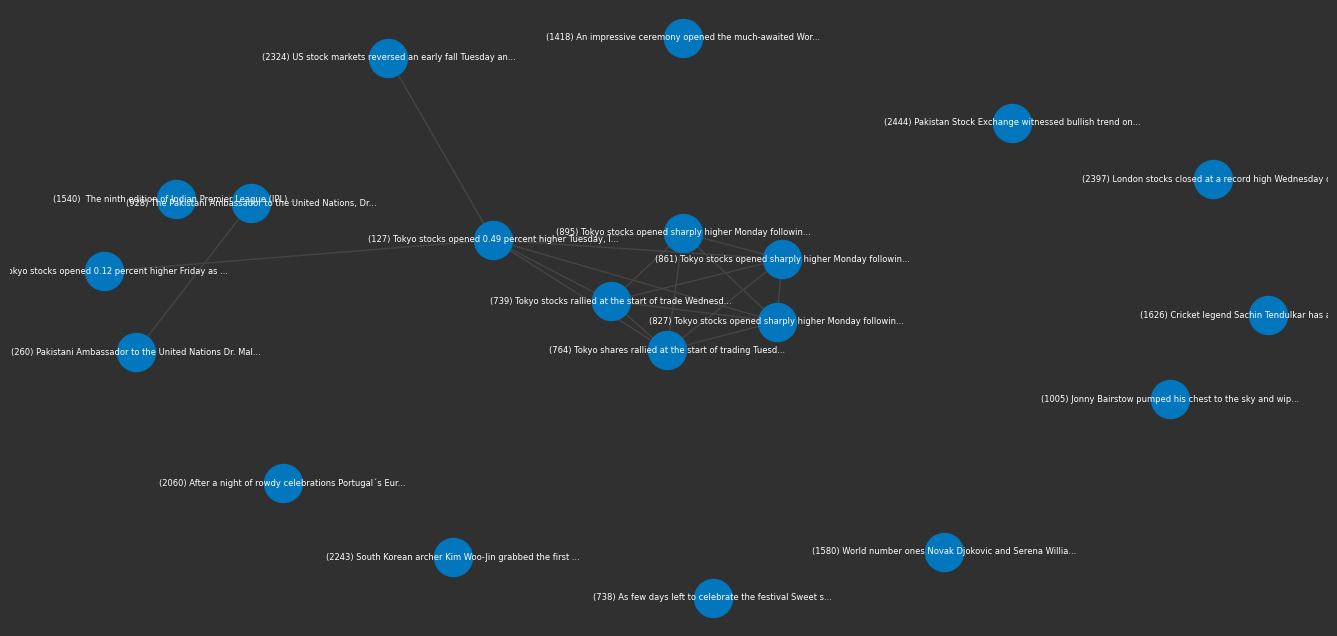

In [12]:
# Plot the graph of the search results to visualize article relationships
def plot(graph):
    labels = {id: f"({id}) {graph.attribute(id, 'text')[:50]}..." for id in graph.scan()}
    options = {
        "node_size": 750,
        "node_color": "#0277bd",
        "edge_color": "#454545",
        "font_color": "#fff",
        "font_size": 6,
        "alpha": 1.0
    }

    fig, ax = plt.subplots(figsize=(17, 8))
    pos = nx.spring_layout(graph.backend, seed=0, k=0.9, iterations=50)
    nx.draw_networkx(graph.backend, pos=pos, labels=labels, **options)
    ax.set_facecolor("#303030")
    ax.axis("off")
    fig.set_facecolor("#303030")

    plt.show()

plot(graph)